In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
# import squidpy as sq
import numpy as np
import cell2location

Global seed set to 0


In [2]:
import scanpy.external as sce
import scvi
# from scvi.model import CondSCVI, DestVI
# from scvi.external import RNAStereoscope, SpatialStereoscope

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.1.1
absl                        NA
anyio                       NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
botocore                    1.23.24
cell2location               NA
certifi                     2022.06.15
cffi                        1.15.0
charset_normalizer          2.0.7
chex                        0.1.3
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.0
decorator                   5.1.1
defusedxml                  0.7.1
deprecate                   0.3.1
docrep                      0.3.2
entrypoints                 0.3
etils                       0.6.0
fastjsonschema              NA
flatbuffers                 2.0
flax                        0.5.2
fsspec                      2022.5.0
google                      NA
h5py     

In [6]:
# t1l_day7_slideseq = sc.read_h5ad("./../t1l_day7_slideseq_mm_with_image_filtered_processed.h5ad", )

In [5]:
heart_infection_sc_no_viral_genes = sc.read_h5ad('./../pyobjs_github/heart_infection_sc_raw_counts.h5ad')
# heart_infection_sc_no_viral_genes.layers["counts"] = heart_infection_sc_no_viral_genes.X.copy()
heart_infection_sc_no_viral_genes.obs = sc.read_h5ad("./../pyobjs_github/heart_infection_sc.h5ad").obs
heart_infection_sc_no_viral_genes

AnnData object with n_obs × n_vars = 31684 × 22757
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'condition_colors'

In [6]:
heart_infection_sc_no_viral_genes = heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs["celltypes_leiden_0.5"] != ""]
heart_infection_sc_no_viral_genes

View of AnnData object with n_obs × n_vars = 31584 × 22757
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'condition_colors'

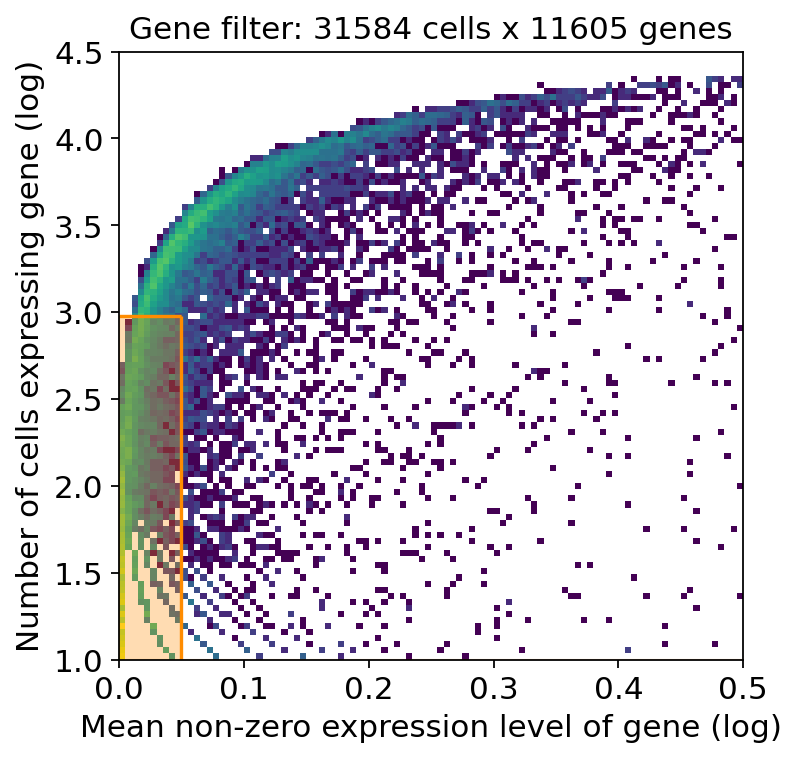

In [9]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(heart_infection_sc_no_viral_genes, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

# filter the object
adata_ref = heart_infection_sc_no_viral_genes[:, selected].copy()

In [10]:
adata_ref.obs.columns

Index(['sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1',
       'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes',
       'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5',
       'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3',
       'celltypes_leiden_0.5', 'celltype_groups'],
      dtype='object')

In [11]:
# prepare anndata for the regression model
cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                        # 10X reaction / sample / batch
                        batch_key='sample',
                        # cell type, covariate used for constructing signatures
                        labels_key='celltypes_leiden_0.5')

Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [12]:
from cell2location.models import RegressionModel
mod = RegressionModel(adata_ref)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.16.4.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'sample',
│   'labels_key': 'celltypes_leiden_0.5',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 31584 │
│          n_vars          │ 11605 │
│         n_batch          │   6   │
│         n_labels         │  19   │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
│    ind_x     │   adata.obs['_indices']   │
└──────────────┴───────────────────────────┘

                       batch State Registry                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃     Categories     ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['sample'] │  Heart_Mock_D4PI   │          0          │
│                     │ Heart_T1L-WT_D4PI  │          1          │
│                     │  Heart_Mock_D7PI   │          2          │
│                     │ Heart_T1L-WT_D7PI  │          3          │
│                     │  Heart_Mock_D10PI  │          4          │
│                     │ Heart_T1L-WT_D10PI │          5          │
└─────────────────────┴────────────────────┴─────────────────────┘

                                   labels State Registry                                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃          Source Location          ┃          Categories           ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['celltypes_leiden_0.5'] │            B cells            │          0          │
│                                   │        Cardiomyocytes         │          1          │
│                                   │       Ccl2+ fibroblasts       │          2          │
│                                   │      Cxcl9-high inflamed      │          3          │
│                                   │       endothelial cells       │                     │
│                                   │        Dendritic cells        │          4          │
│                                   │       Endocardial cells       │          5          │
│                                   │       Endothelial cells       │          6          │
│                                   │         Erythroblasts         │          7          │
│                                   │          Fibroblasts          │          8          │
│                                   │  Inflamed endothelial cells   │          9          │
│                                   │          Macrophages          │         10          │
│                                   │ Mesenchymal endothelial cells │         11          │
│                                   │           NK cells            │         12          │
│                                   │          Neutrophils          │         13          │
│                                   │       Pericardial cells       │         14          │
│                                   │           Pericytes           │         15          │
│                                   │         Schwann cells         │         16          │
│                                   │      Smooth muscle cells      │         17          │
│                                   │            T cells            │         18          │
└───────────────────────────────────┴───────────────────────────────┴─────────────────────┘

In [13]:
mod.train(max_epochs=250, use_gpu=2)

Created a temporary directory at /tmp/tmpy8smztgj
Writing /tmp/tmpy8smztgj/_remote_module_non_scriptable.py
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 250/250: 100%|██████████| 250/250 [12:51<00:00,  3.08s/it, v_num=1, elbo_train=1.61e+8]


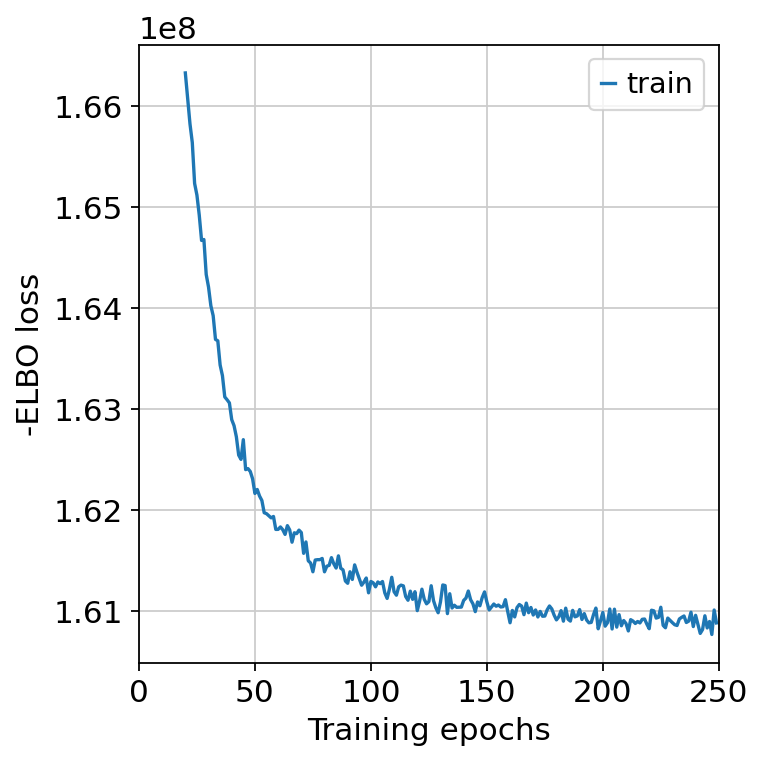

In [14]:
mod.plot_history(20)

In [15]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_ref = mod.export_posterior(
    adata_ref, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

# Save model
mod.save(f"sc_cell2location_ref", overwrite=True)

# Save anndata object with results
adata_file = f"heart_infection_sc_no_viral_genes_cell2location.h5ad"
adata_ref.write(adata_file)
adata_file

Sampling global variables, sample: 100%|██████████| 999/999 [00:09<00:00, 104.40it/s]


'heart_infection_sc_no_viral_genes_cell2location.h5ad'

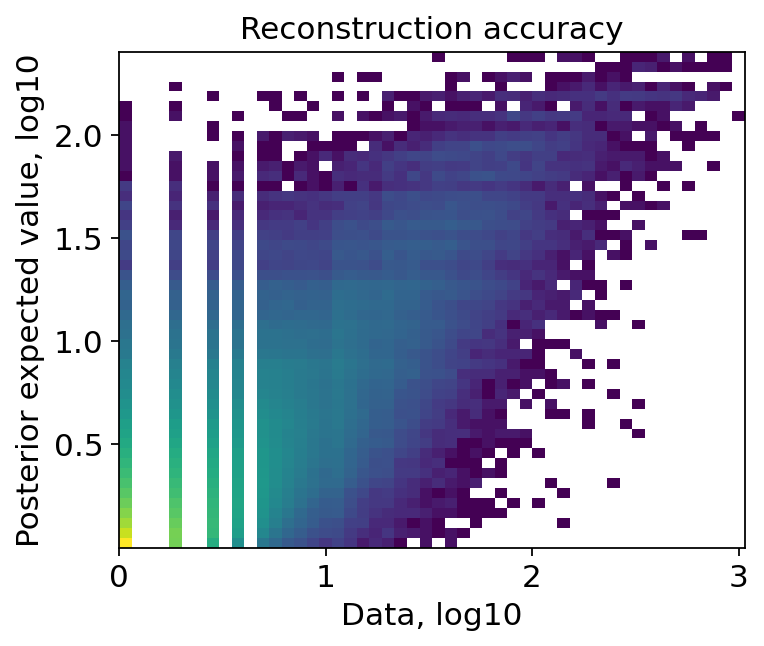

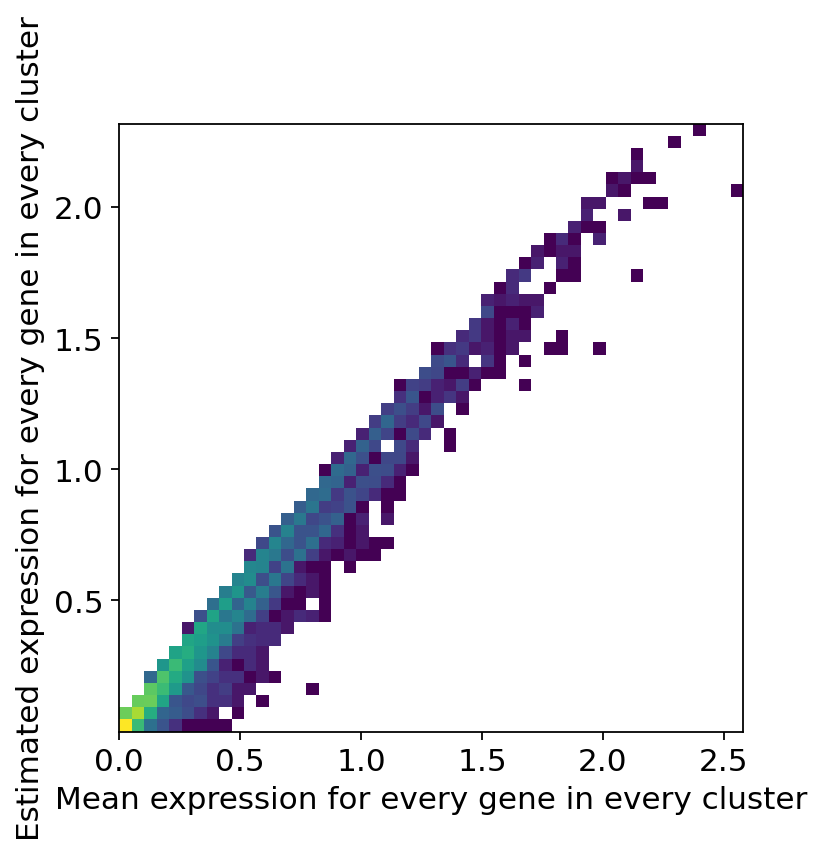

In [16]:
mod.plot_QC()

In [17]:
adata_file = f"heart_infection_sc_no_viral_genes_cell2location.h5ad"
adata_ref = sc.read_h5ad(adata_file)
mod = cell2location.models.RegressionModel.load(f"sc_cell2location_ref", adata_ref)

INFO     File sc_cell2location_ref/model.pt already downloaded                               
INFO     Preparing underlying module for load                                                


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 1/633:   0%|          | 1/633 [00:00<02:08,  4.93it/s, v_num=1, elbo_train=1.74e+8]


In [18]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]

B cells  Cardiomyocytes  Ccl2+ fibroblasts  \
Rp1     0.002075        0.050569           0.001716   
Sox17   0.007470        0.035852           0.004117   
Mrpl15  0.240195        0.515905           0.330243   
Lypla1  0.046616        0.130619           0.106822   
Tcea1   0.104507        0.084514           0.182634   

        Cxcl9-high inflamed\n endothelial cells  Dendritic cells  
Rp1                                    0.000918         0.001103  
Sox17                                  0.737784         0.010690  
Mrpl15                                 0.394778         0.189771  
Lypla1                                 0.194293         0.061742  
Tcea1                                  0.201065         0.097986

In [19]:
adata_vis = sc.read_visium(path="./../spatialData/T1L-Heart-D7PI/outs/")
adata_vis.var_names_make_unique()
print(adata_vis)

reoviral_genes = [name for name in adata_vis.var_names if name.startswith('Reo')]
print(reoviral_genes)
viral_expression = adata_vis[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(adata_vis.var_names, reoviral_genes)
adata_vis = adata_vis[:, ~reoviral_genes_indicator]
adata_vis.var_names = [name.split("_")[1] for name in adata_vis.var_names]
adata_vis.obs.join(viral_expression.astype(int))
print(adata_vis.shape)

adata_vis.obs_names_make_unique()
adata_vis.var_names_make_unique()

sc.pp.filter_cells(adata_vis, min_counts=1)
sc.pp.filter_genes(adata_vis, min_cells=1)

adata_vis.var['mt'] = adata_vis.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_vis, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_vis.layers["counts"] = adata_vis.X.copy()

reading ../spatialData/T1L-Heart-D7PI/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2278 × 54848
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(2278, 54838)
filtered out 36885 genes that are detected in less than 1 cells


In [20]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
adata_vis = adata_vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis)

In [21]:
# create and train the model
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=20,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=200
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.16.4.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 2278  │
│          n_vars          │ 11238 │
│         n_batch          │   1   │
│         n_labels         │   1   │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
│    ind_x     │   adata.obs['_indices']   │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 10000/10000: 100%|██████████| 10000/10000 [15:40<00:00, 10.64it/s, v_num=1, elbo_train=8.05e+6]


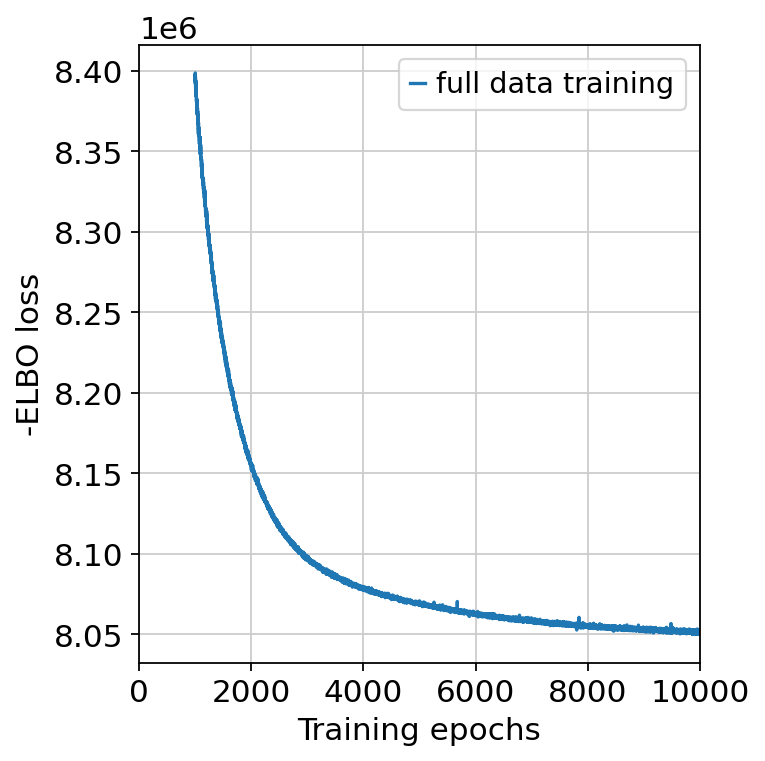

In [22]:
mod.train(max_epochs=10000,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1,
          use_gpu=2)

# plot ELBO loss history during training, removing first 100 epochs from the plot
mod.plot_history(1000)
plt.legend(labels=['full data training']);

In [23]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': mod.adata.n_obs, 'use_gpu': True}
)

# Save model
mod.save(f"sp_cell2location_visium", overwrite=True)

# mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

# Save anndata object with results
adata_file = f"t1l_day7_visium_cell2location.h5ad"
adata_vis.write(adata_file)
adata_file

Sampling global variables, sample: 100%|██████████| 999/999 [00:16<00:00, 59.46it/s]


... storing 'feature_types' as categorical
... storing 'genome' as categorical


't1l_day7_visium_cell2location.h5ad'

In [1]:
adata_file = f"t1l_day7_visium_cell2location.h5ad"
adata_vis = sc.read_h5ad(adata_file)
adata_vis
# mod = cell2location.models.Cell2location.load(f"sp_cell2location_visium", adata_vis)

NameError: name 'sc' is not defined

In [16]:
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': mod.adata.n_obs, 'use_gpu': True}, 
)

Sampling global variables, sample: 100%|██████████| 999/999 [00:17<00:00, 55.70it/s]


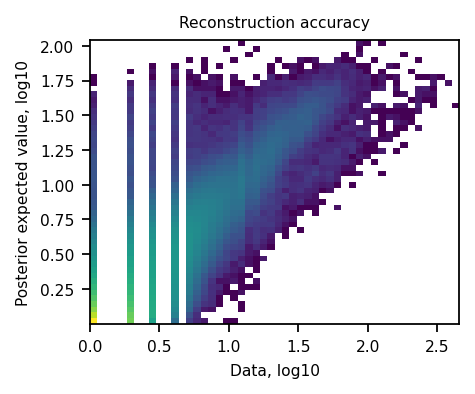

In [17]:
mod.plot_QC()

In [ ]:
## Visualising cell abundance in spatial coordinates

In [24]:
print(adata_vis.obsm)
adata_vis.obsm['q05_cell_proportions'] = adata_vis.obsm['q05_cell_abundance_w_sf'].div(adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis=1), axis=0)

AxisArrays with keys: means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf


In [25]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs["total_abundance"] = adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis = 1)
# adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_proportions']
adata_vis.obs["max_pred"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].max(axis=1)
adata_vis.obs["max_pred_celltype"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].idxmax(axis=1)

In [26]:
sc_cluster_order = ["Endocardial cells",
                                "Pericardial cells",
                                "Schwann cells",
                                "Ccl2+ fibroblasts",
                                "Fibroblasts", 
                                "Neutrophils",
                                "Dendritic cells",
                                "Macrophages",
                                "B cells",
                                "NK cells",
                                "T cells",
                                "Cxcl9-high inflamed\n endothelial cells",
                                "Endothelial cells",
                                "Inflamed endothelial cells",
                                "Smooth muscle cells",
                                "Mesenchymal endothelial cells",
                                "Pericytes", 
                                "Cardiomyocytes",
                                "Erythroblasts"]
# T1L_heart_D7PI_visium_no_viral_genes.obs["max_pred_celltype"] = T1L_heart_D7PI_visium_no_viral_genes.obs["max_pred_celltype"].astype("category")
# T1L_heart_D7PI_visium_no_viral_genes.obs["max_pred_celltype"].cat.reorder_categories(
#     new_categories= sc_cluster_order, inplace = True)

... storing 'max_pred_celltype' as categorical


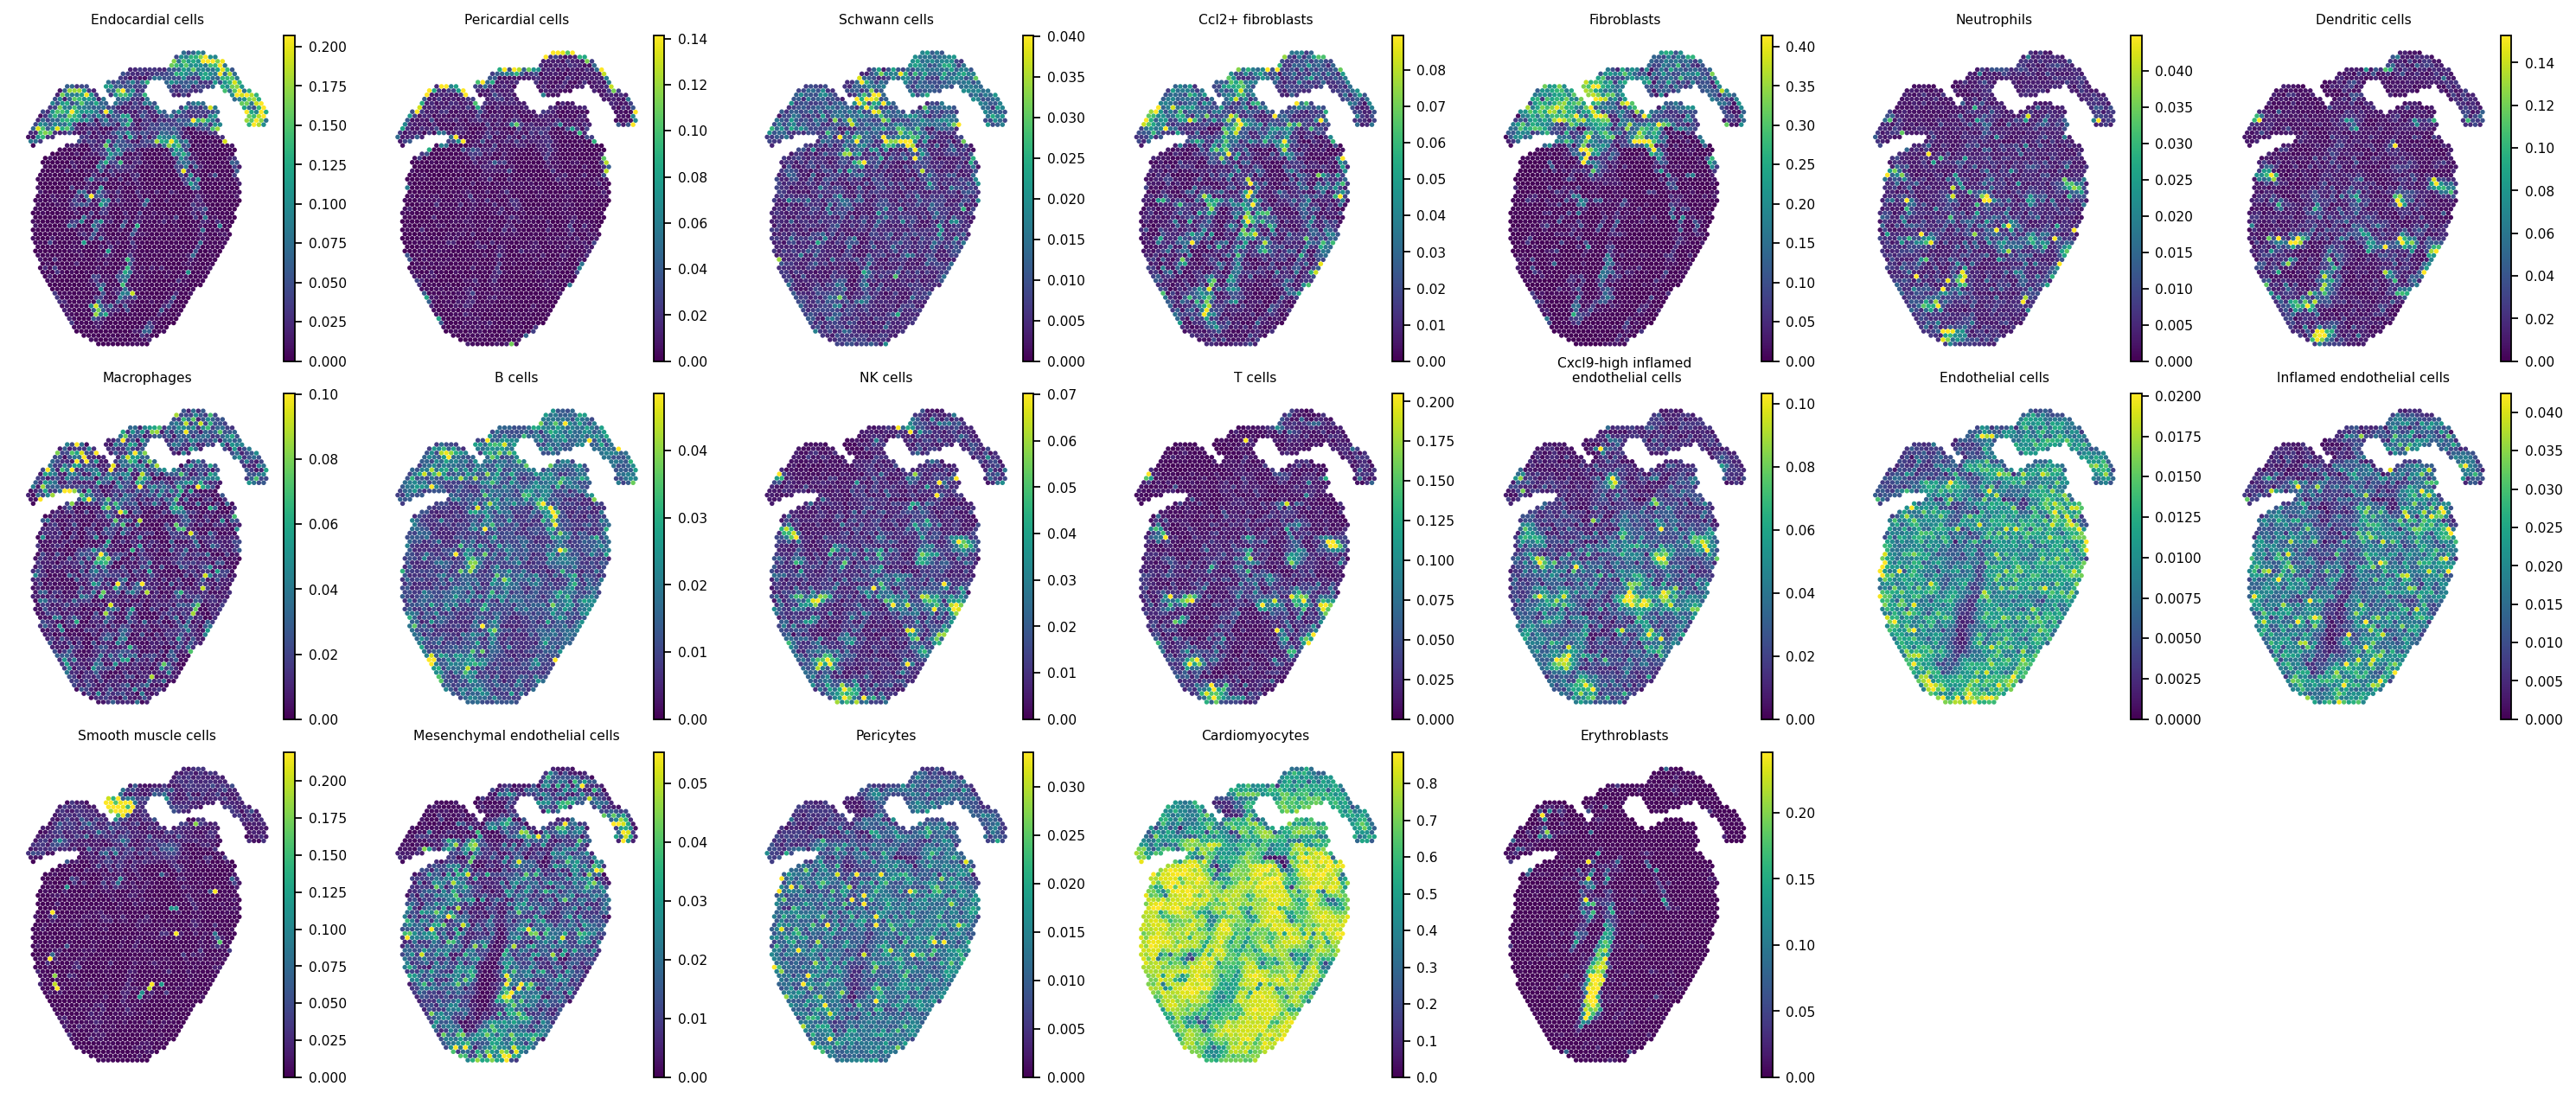

In [27]:
# plot in spatial coordinates
sc.settings.set_figure_params(dpi_save= 400, fontsize=7, figsize=(3.0,3.0), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.spatial(adata_vis, color=sc_cluster_order, ncols=7, frameon=False, 
              size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1,
              # limit color scale at 99.2% quantile of cell abundance
              vmin=0, vmax='p99.2'
             )

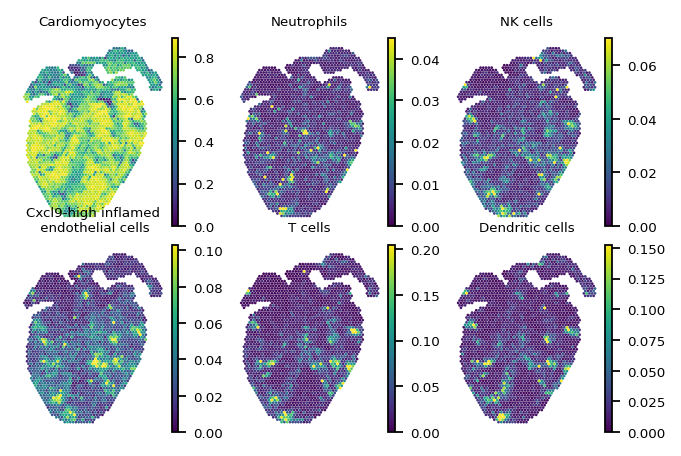

In [28]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.5,1.5), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.spatial(adata_vis, color=["Cardiomyocytes", "Neutrophils", "NK cells", "Cxcl9-high inflamed\n endothelial cells", "T cells", "Dendritic cells"], ncols=3, frameon=False, 
              size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, vmin=0, vmax='p99.2', save="cell_comp_interest_cell2loc.pdf")

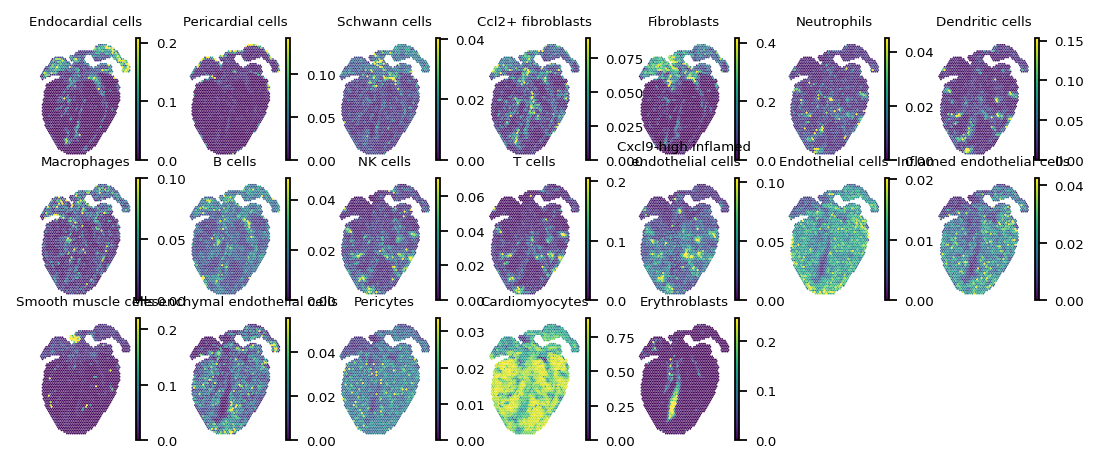

In [41]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.0,1.0), facecolor='white', frameon=True, transparent=True, vector_friendly = False, format="pdf")
sc.pl.spatial(adata_vis, color=sc_cluster_order, ncols=7, frameon=False, 
              size=1.5, scale_factor=1.0, hspace=0.15, wspace=0.15, vmin=0, vmax='p99.2', save="cell_comp_cell2loc.pdf")

<AxesSubplot:xlabel='T cells', ylabel='Count'>

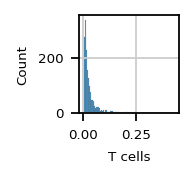

In [40]:
sns.histplot(adata_vis.obs, x = "T cells")

In [30]:
adata_vis.obs["regions"] = sc.read_h5ad(filename="./../pyobjs_github/T1L_heart_D7PI.h5ad").obs["anatomical_regions_leiden_0.8"]
ventricle_only = adata_vis[adata_vis.obs["regions"].isin(["Inflamed ventricle", "Myocarditic region", "Border zone"]),:]
ventricle_only.obs["regions"].cat.reorder_categories(new_categories=["Inflamed ventricle", "Border zone", "Myocarditic region"], inplace = True)

/tmp/ipykernel_101026/1902946471.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ventricle_only.obs["regions"].cat.reorder_categories(new_categories=["Inflamed ventricle", "Border zone", "Myocarditic region"], inplace = True)


In [31]:
import pickle
with open('./../pyobjs_github/anatomical_reions_colors.pickle', 'rb') as handle:
    anatomical_reions_colors = pickle.load(handle)
print(anatomical_reions_colors)
color_p = [anatomical_reions_colors[x] for x in list(ventricle_only.obs["regions"].cat.categories)]
color_p

{'Atria': '#e41a1c', 'Ventricle': '#377eb8', 'Inflamed atria': '#4daf4a', 'Inflamed ventricle': '#984ea3', 'Myocarditic region': '#ff7f00', 'Border zone': '#ffff33', 'Outflow tract': '#a65628', 'Valve': '#f781bf', 'Chamber cavity': '#999999'}


['#984ea3', '#ffff33', '#ff7f00']

/tmp/ipykernel_101026/4270244525.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


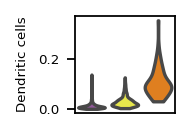

In [39]:
# ["Cardiomyocytes", "Neutrophils", "NK cells", "Cxcl9-high inflamed\n endothelial cells", "T cells", "Dendritic cells"]
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(0.8,0.8), transparent=True, format="pdf")
fig, ax = plt.subplots()
ax.set_axisbelow(True)
sc.pl.violin(ventricle_only, keys=["Dendritic cells"], groupby="regions", rotation=60, stripplot=False, show=False, ax = ax, palette = color_p)
plt.xticks([])
ax.set_axisbelow(True)
plt.grid(b=None)
# plt.tight_layout()
# plt.show()
plt.savefig("figures/dc_prop_violin_cell2loc.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [38]:
from cell2location import run_colocation
res_dict, adata_vis = run_colocation(
    adata_vis,
    model_name='CoLocatedGroupsSklearnNMF',
    train_args={
      'n_fact': np.arange(5, 30), # IMPORTANT: use a wider range of the number of factors (5-30)
      'n_restarts': 3 # number of training restarts
    },
    export_args={'path': f'cell2loc_NMF_visium/CoLocatedComb/'}
)

### Analysis name: CoLocatedGroupsSklearnNMF_5combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_6combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_7combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_8combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_9combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_10combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_11combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_12combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_13combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_14combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead


Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_15combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_16combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_17combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_18combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_19combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_20combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_21combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_22combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_23combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_24combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_25combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_26combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_27combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_28combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0
### Analysis name: CoLocatedGroupsSklearnNMF_29combinations_2278locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
/home/mm2937/miniconda3/en

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 index 0 is out of bounds for axis 0 with size 0


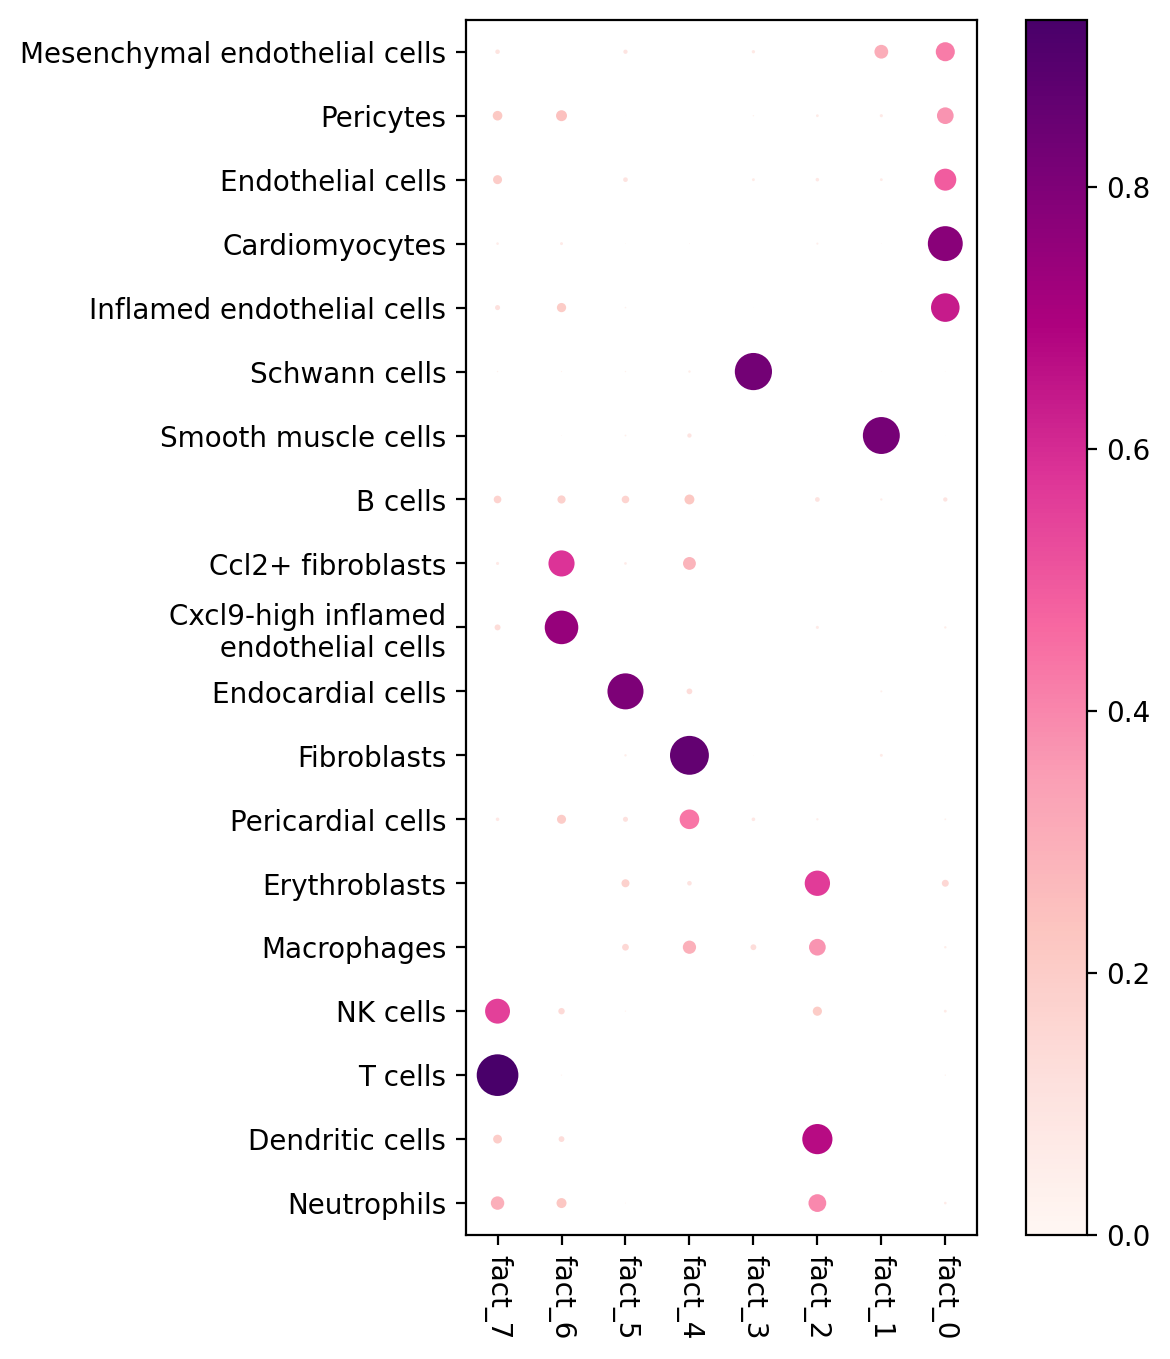

In [55]:
res_dict['n_fact8']['mod'].plot_cell_type_loadings()

In [65]:
# Compute expected expression per cell type
expected_dict = mod.module.model.compute_expected_per_cell_type(
    mod.samples["post_sample_q05"], mod.adata_manager
)

# Add to anndata layers
for i, n in enumerate(mod.factor_names_):
    adata_vis.layers[n] = expected_dict['mu'][i]

# Save anndata object with results
adata_file = f"t1l_day7_visium_cell2location_nmf.h5ad"
adata_vis.write(adata_file)
adata_file

't1l_day7_visium_cell2location_nmf.h5ad'

In [17]:
adata_vis = sc.read_h5ad("t1l_day7_visium_cell2location_nmf.h5ad")
adata_vis

AnnData object with n_obs × n_vars = 2278 × 11238
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'B cells', 'Cardiomyocytes', 'Ccl2+ fibroblasts', 'Cxcl9-high inflamed\n endothelial cells', 'Dendritic cells', 'Endocardial cells', 'Endothelial cells', 'Erythroblasts', 'Fibroblasts', 'Inflamed endothelial cells', 'Macrophages', 'Mesenchymal endothelial cells', 'NK cells', 'Neutrophils', 'Pericardial cells', 'Pericytes', 'Schwann cells', 'Smooth muscle cells', 'T cells', 'max_pred', 'max_pred_celltype', 'regions', 'sample', 'mean_nUMI_factorsfact_0', 'mean_nUMI_factorsfact_1', 'mean_nUMI_factorsfact_2', 'mean_nUMI_factorsfact_3', 'mean_nUMI_factorsfact_4', 'mean_nUMI_factorsfact_5', 'mean_nUMI_factorsfact_6', 'mean_nUMI_factorsfact_7', 'mean_nUMI_factorsfact_8', 'mean_nUMI_factorsfact_9', 'mean_nUMI_factorsfact_10', 'mean_nUMI_factorsfact_11',